#Life Insurance Assessment
PT. XYZ adalah salah satu asuransi terbesar di USA. Selama ini proses aplikasi asuransi  memerlukan waktu yang lama yaitu sekitar 30 hari. Selain itu, pelanggan diharuskan memberikan informasi yang sangat detail. Itulah mengapa hanya 40% rumah tangga AS yang memiliki asuransi jiwa perorangan. 
<br>
<br>

PT. XYZ ingin membuat proses aplikasi lebih cepat yaitu dengan memanfaatkan pemodelan prediktif. Model ini diharapkan dapat memprediksi secara akurat resiko calon applicant. Dengan mengetahui lebih cepat tingkat resiko calon applicant, PT. XYZ dapat dengan lebih cepat menyelesaikan proses aplikasi dan mengakuisisi customer. 

In [0]:
#Importing Libaries
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt # visualization
%matplotlib inline
import seaborn as sns #visualization

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data_train = pd.read_csv("/content/drive/My Drive/Buat Belajar/FINAL TEST BOS/train.csv")
data_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data_test = pd.read_csv("/content/drive/My Drive/Buat Belajar/FINAL TEST BOS/test.csv")
data_test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,0.150,3,1,0.00,2,0.50,2,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.627451,0.760563,NaN,2.0,16,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,0.000,1,3,0.07,2,0.20,1,2,8,3,1,1,1,1,1,3,1,0.001667,1,1,2,2,NaN,0.529412,0.746479,NaN,5.0,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.519103,0.143,9,1,0.00,2,0.45,1,2,3,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.666667,NaN,0.661972,NaN,3.0,132,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.486962,0.210,9,1,0.00,2,1.00,2,2,3,3,1,1,1,1,1,3,1,0.000667,2,1,2,2,NaN,0.686275,0.676056,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.428718,0.085,9,1,0.00,2,0.20,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.449275,NaN,0.380282,NaN,18.0,181,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df = data_train.append(data_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
df.shape

(79146, 128)

In [7]:
df['Response'][59381:]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
19760   NaN
19761   NaN
19762   NaN
19763   NaN
19764   NaN
Name: Response, Length: 19765, dtype: float64

In [8]:
# drop Target in Data Test
data = df.drop(columns=['Response'])
data.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Ht,Id,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,...,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt
0,0.323008,0.028,12,1,0.0,3,NaN,2,NaN,0.598039,NaN,0.526786,0.581818,2,0.641791,1,1,3,1,0.000667,1,1,2,1,2,6,3,1,2,1,4.0,NaN,3,2,3,3,240.0,3,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D3,10,0.076923,2,1,1,0.148536
1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.188406,NaN,0.084507,NaN,0.600000,5,0.059701,2,1,3,1,0.000133,1,3,2,1,2,6,3,1,2,1,5.0,NaN,3,2,3,3,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,A1,26,0.076923,2,3,1,0.131799
2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.304348,NaN,0.225352,NaN,0.745455,6,0.029851,2,1,1,3,NaN,3,2,3,1,2,8,3,1,1,1,10.0,NaN,3,2,3,3,NaN,1,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,E1,26,0.076923,2,3,1,0.288703
3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.420290,NaN,0.352113,NaN,0.672727,7,0.164179,2,1,1,3,NaN,3,2,3,2,2,8,3,1,2,1,0.0,NaN,3,2,3,3,NaN,1,3,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D4,10,0.487179,2,3,1,0.205021
4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.463768,NaN,0.408451,NaN,0.654545,8,0.417910,2,1,1,3,NaN,3,2,3,1,2,6,3,1,2,1,NaN,NaN,3,2,3,3,NaN,1,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D2,26,0.230769,2,3,1,0.234310


In [9]:
data.shape

(79146, 127)

## Data Overview

In [10]:
list(data.columns)

['BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Ht',
 'Id',
 'Ins_Age',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Medical_History_1',
 'Medical_History_10',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_15',
 'Medical_History_16',
 'Medical_History_17',
 'Medical_History_18',
 'Medical_History_19',
 'Medical_History_2',
 'Medical_History_20',
 'Medical_History_21',
 'Medical_History_22',
 'Medical_History_23',
 'Medical_History_24',
 'Medical_History_25',
 'Medical_Hist

Dari 127 features, saya akan merangkum features tersebut menjadi 12 yaitu sebagai berikut :
1. **Id**: ConsumerId
2. **Product_Info_1-7**: Informasi Produk
3. **Ins_Age**: Usia pelanggan
4. **Ht**: Tinggi pelanggan
5. **Wt**: Berat pelanggan
6. **BMI**: Indeks Masa Tubuh (Ideal), Kurang, Lebih
7. **Employment_Info_1-6**:  riwayat pekerjaan pelamar.
8. **InsuredInfo1-7**: Informasi Pelanggan
9. **Insurance_History_1-9**:  riwayat asuransi pelanggan
10. **Family_Hist_1-5**:  riwayat keluarga pelanggan
11. **Medical_History_1-41**: riwayat medis pelanggan
12. **Medical_Keyword_1-48**: ada / tidaknya kata kunci medis yang dikaitkan dengan permohonan asuransi

##EDA

### Response Analysis

In [11]:
Resp=(data_train['Response'])
Response= data_train.Response.value_counts().head(5)
Response

0    44181
1    15200
Name: Response, dtype: int64

<function matplotlib.pyplot.show>

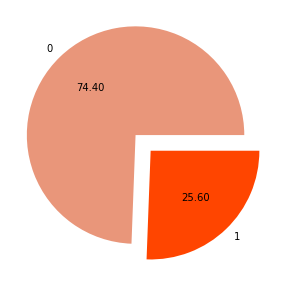

In [12]:
colors = ['darksalmon', 'orangered']
explode = (0.1 , 0.1)

plt.figure(figsize=(5,5))
plt.pie(Response, labels=Response.index, autopct='%.2f',colors=colors,explode=explode)
plt.show

Berdasarkan visualisasi tersebut, dapat diketahui bahwa dari data perusahaan, pelanggan yang beresiko rendah untuk mendapatkan asuransi lebih banyak dibanding pelanggan yang beresiko tinggi untuk mendapatkan asuransi.
<br>
<br>
Sehingga dapat diketahui bahwa pelanggan asuransi PT.XXX lebih banyak pelanggan yang mengantisipasi klaim yang akan terjadi dibandingkan pelanggan yang benar-benar akan menerima klaim.

### Health Visualization

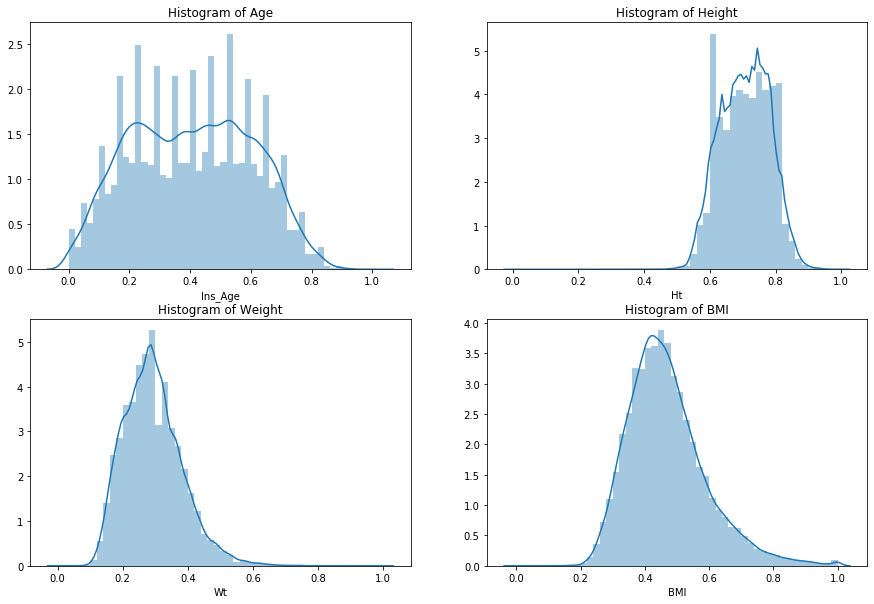

In [13]:
f=plt.figure(figsize=(15,10))
# plt.style.use('ggplot')

f.add_subplot(2,2,1)
sns.distplot(data_train['Ins_Age'])
plt.title('Histogram of Age')

f.add_subplot(2,2,2)
sns.distplot(data_train['Ht'])
plt.title('Histogram of Height')

f.add_subplot(2,2,3)
sns.distplot(data_train['Wt'])
plt.title('Histogram of Weight')

f.add_subplot(2,2,4)
sns.distplot(data_train['BMI'])
plt.title('Histogram of BMI')

plt.show()

Dilihat berdasarkan fisik konsumen, saya mengambil empat variabel yang berkaitan dengan hal tersebut, yaitu :
- Age <br>
Berdasarkan displot, diketahui bahwa pelanggan asuransi ini merata untuk semua umur dari anak-anak hingga dewasa karena persebaran datanya sangat beragam di beberapa titik normalisasi tabel.
- Height<br>
Berdasarkan displot, diketahui bahwa tinggi pelanggan lebih banyak di tinggi yang diatas rata-rata. Hal ini berarti bahwa kebanyakan pelanggan asuransi adalah orang dewasa. Dimana orang dewasa ini bisa dikatakan orang yang sudah berpenghasilan dan mampu membayar asuransi baik untuk dirinya sendiri, untuk orang tua mereka, maupun untuk anak-anak mereka.
- Weight<br>
Berdasarkan displot, diketahui bahwa berat badan pelanggan lebih banyak berada dibawah rata-rata. Hal ini berarti bahwa berat badan pelanggan masih tergolong normal (tidak kurang atau berlebih)
- BMI<br>
Body Mass Index (BMI) atau Indeks Massa Tubuh (IMT) adalah angka yang menentukan apakah berat badan seseorang ideal, kurang, atau berlebih.

## Data Preprocessing

### Handling Missing Value

In [14]:
#Persentase Data yang Missing
sum(data.isnull().sum())/(data.shape[0]*data.shape[1])*100

5.210931815237901

Terdapat missing value pada dataset sebesar 5.17%.

In [15]:
#List Feature dengan data Missing terbesar
data_missing = pd.DataFrame(data.isnull().sum() / len(data)).sort_values(by=0, ascending=False)
data_missing.head(10)

,0
Medical_History_10,0.990423
Medical_History_32,0.981578
Medical_History_24,0.937066
Medical_History_15,0.751270
Family_Hist_5,0.700414
Family_Hist_3,0.572423
Family_Hist_2,0.486898
Insurance_History_5,0.423281
Family_Hist_4,0.326751
Employment_Info_6,0.184987


In [16]:
#List feature yang memiliki data missing lebih dari 60 %
notimportant = data_missing[data_missing[0] > 0.6]
notimportant

,0
Medical_History_10,0.990423
Medical_History_32,0.981578
Medical_History_24,0.937066
Medical_History_15,0.751270
Family_Hist_5,0.700414


In [17]:
#drop feature yang memiliki missing lebih dari 60%
data.drop(columns=notimportant.index, inplace=True)
data.shape

(79146, 122)

In [0]:
#isi data yang kosong lainnya dengan median
for feature in data_missing[(data_missing[0] > 0) & (data_missing[0]<= 0.6)].index:
  data[feature] = data[feature].fillna(data[feature].median())

In [19]:
#Persentase Data yang Missing
sum(data.isnull().sum())/(data.shape[0]*data.shape[1])*100

0.0

### Handling Variable

#### Small Variance
Karena small variances hanya akan memberikan sedikit informasi.

In [0]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)

In [0]:
#Hanya akan mengambil varians yang lebih dari 0.1.
small_variance = data.columns[(data.std(axis=0) < .1).values]

In [0]:
#drop variabel yang variansnya dikit
data.drop(columns=small_variance, inplace=True)

In [23]:
data.shape

(79146, 102)

#### Correlation Matrix
Karena variabel yang memiliki korelasi besar terhadap variabel lainnya selain variable target tidak baik karena terlalu bergantung. Sehingga harus dihilangkan.

In [0]:
#create correlation matrix
CorMat = data.corr().abs()

In [0]:
# select upper triangle
UpTri = CorMat.where(np.triu(np.ones(CorMat.shape), k=1).astype(np.bool))

In [0]:
#Menjadi Featture yang memiliki korelasi > 0.80
DiDrop = [columns for columns in UpTri.columns if any(UpTri[columns] > 0.8)]

In [0]:
data.drop(columns=DiDrop, inplace=True)

In [28]:
data.shape

(79146, 91)

Setelah dilakukan prepocessing dengan 3 cara yaitu menghapus kolom yang missing valuenya lebih dari 60%, memiliki small variance di bawah 0.1, dan correlation matrix lebih dari 80%, didapatkan dataset untuk modelling sebesar 91 features.

## Splitting Data

In [0]:
data['Response'] = df['Response']

In [0]:
training = data[:59381]
test = data[59381:]

In [0]:
x = training.drop(columns=['Response', 'Id'])
y = training['Response']

In [32]:
x.shape

(59381, 90)

In [33]:
y.shape

(59381,)

## Balancing Data

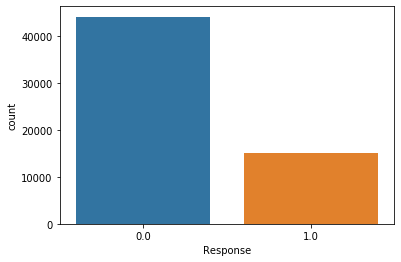

In [34]:
import seaborn as sns
sns.countplot(data['Response'])

Karena data inbalance, maka saya akan melakukan balancing data menggunakan teknik oversampling SMOTE.

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resample, y_resample = smote.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [36]:
print(x_resample.shape)
print(y_resample.shape)

(88362, 90)
(88362,)


# Rescalling Data
Agar data memiliki satuan yang sama

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
x_resample = scaler.fit_transform(x_resample)

## Modelling

### Train Test Split

In [0]:
train = training.drop(columns=['Response', 'Id'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.3)

### Model Comparison

In [0]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
## collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier]

In [42]:
## loop for all model
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    datatr.append(model.score( X_train , y_train ))
    datasc.append(model.score( X_test , y_test ))
    Recall.append(recall_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:24

In [43]:
## compare model each other

data1 = pd.DataFrame()
data1['model'] = all_model
data1['Accuracy training'] = datatr
data1['Accuracy test'] = datasc
data1['Precision'] = Precision
data1['Recall']= Recall
data1['AUC']=auc
data1['gap'] = abs(data1['Accuracy training'] - data1['Accuracy test'])
data1.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
7,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.803902,0.794387,0.702479,0.336634,0.643901,0.009515
1,<class 'sklearn.linear_model.logistic.Logistic...,0.786268,0.783329,0.652290,0.322772,0.631921,0.002939
8,<class 'sklearn.ensemble.forest.ExtraTreesClas...,1.000000,0.779006,0.637681,0.309791,0.624752,0.220994
6,<class 'sklearn.ensemble.forest.RandomForestCl...,0.982750,0.778838,0.638065,0.307591,0.623916,0.203912
4,<class 'sklearn.svm.classes.SVC'>,0.999856,0.745327,0.900000,0.001980,0.500952,0.254529
5,<class 'sklearn.svm.classes.LinearSVC'>,0.741832,0.738591,0.461326,0.146975,0.544098,0.003241
2,<class 'sklearn.neighbors.classification.KNeig...,0.798465,0.721751,0.418319,0.232123,0.560787,0.076714
3,<class 'sklearn.naive_bayes.GaussianNB'>,0.720637,0.715464,0.449479,0.512871,0.648862,0.005173
0,<class 'sklearn.tree.tree.DecisionTreeClassifi...,1.000000,0.701937,0.419048,0.435644,0.614393,0.298063


### Tuning Hyperparameter Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV            
p_test3 = {'learning_rate':[0.01,0.005,0.001], 'n_estimators':[100,250,500,750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.01, 'n_estimators': 750}, 0.7956984838531636)

### Fit Fix Model

In [45]:
model=GradientBoostingClassifier(learning_rate=0.01,n_estimators=750)
model.fit(X_train,y_train)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [0]:
y_pred=model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87     13270
         1.0       0.72      0.31      0.44      4545

    accuracy                           0.79     17815
   macro avg       0.76      0.64      0.66     17815
weighted avg       0.78      0.79      0.76     17815



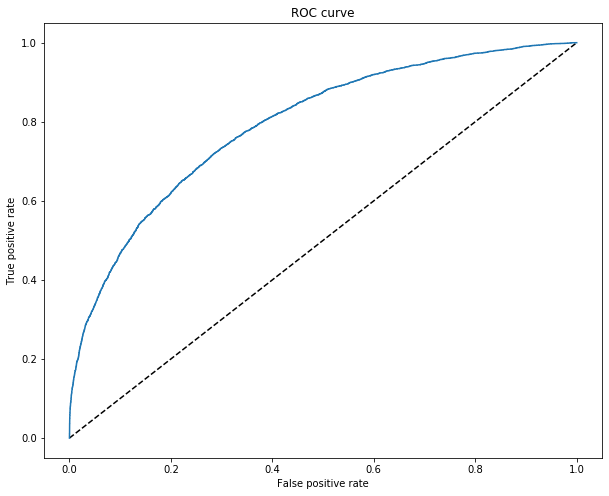

In [47]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_ensemble):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr)
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

print(classification_report(y_test,y_pred))
y_pred_proba=model.predict_proba(X_test)
plot_roc_curve(y_test,y_pred_proba[:,1])

## Top 5 Features

In [0]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

to_bar = pd.DataFrame([data.columns[indices],importances[indices]]).transpose()
to_bar.columns = ['Feature','Value']

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
Feature ranking:


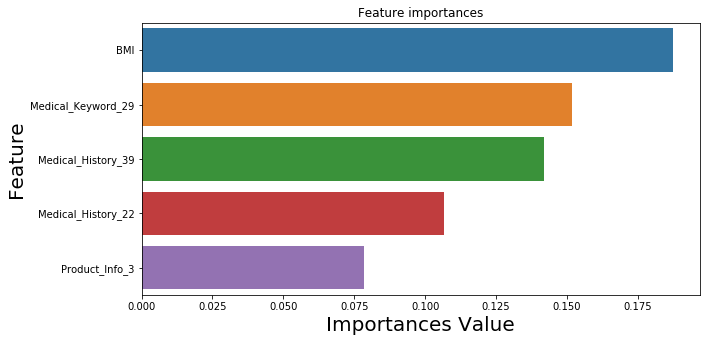

1. feature BMI (0.187357)
2. feature Medical_Keyword_29 (0.151789)
3. feature Medical_History_39 (0.141911)
4. feature Medical_History_22 (0.106626)
5. feature Product_Info_3 (0.078347)


In [49]:
import time
%time
# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 5))
plt.title("Feature importances")
ax = sns.barplot(x='Value',y='Feature',data=to_bar[0:5])
plt.xlabel('Importances Value', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.show()
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, data.columns[indices[f]], importances[indices[f]]))

Variabel yang paling berpengaruh terhadap peluang pelanggan memiliki resiko rendah atau tinggi dalam claim asuransi adalah BMI, Medical_Keyword_29, Medical_Hystory_39, Medical History_22 dan product_info_3.

###Result

In [50]:
test.shape

(19765, 92)

In [51]:
#Persentase Data yang Missing
sum(test.isnull().sum())/(test.shape[0]*test.shape[1])*100

1.0869565217391304

In [52]:
#List Feature dengan data Missing terbesar
data_missing = pd.DataFrame(test.isnull().sum() / len(test)).sort_values(by=0, ascending=False)
data_missing.head()

,0
Response,1.0
Medical_Keyword_16,0.0
Medical_Keyword_3,0.0
Medical_Keyword_29,0.0
Medical_Keyword_28,0.0


In [53]:
#List feature yang memiliki data missing lebih dari 60 %
notimportant = data_missing[data_missing[0] > 0.6]
notimportant.head()

,0
Response,1.0


In [54]:
#drop feature yang memiliki missing lebih dari 60%
test.drop(columns=notimportant.index, inplace=True)
test.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(19765, 91)

In [0]:
#isi data yang kosong lainnya dengan median
for feature in data_missing[(data_missing[0] > 0) & (data_missing[0]<= 0.6)].index:
  test[feature] = test[feature].fillna(test[feature].median())

In [56]:
#Cek Lagi Persentase Data yang Missing
sum(test.isnull().sum())/(test.shape[0]*test.shape[1])*100

0.0

In [0]:
testfix = test.drop(columns=['Id'])

In [58]:
testfix.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_5,Insurance_History_8,InsuredInfo_1,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_27,Medical_History_28,...,Medical_History_41,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_16,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_45,Medical_Keyword_47,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_6,Product_Info_7
0,1360,1952,2,0,0,0,872,2,31,64,54,26,41,1,0,0,1871,1,1,10,1,0,0,0,2,1,0,2,0,1,0,0,15,1,0,1,0,1,0,0,...,2,2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,25,1750,1,0
1,1434,0,0,1,878,0,536,1,31,54,53,23,42,0,0,2,2261,0,0,7,1,0,0,0,5,1,2,2,2,2,0,0,254,1,0,1,2,1,2,0,...,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,79,1,0
2,1626,1930,8,0,0,0,831,2,45,53,47,22,39,1,0,0,1871,1,0,2,1,0,0,0,3,1,2,2,0,2,0,0,128,1,0,1,2,1,2,0,...,2,2,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,25,645,1,0
3,1445,2082,8,0,0,0,1169,1,31,70,48,19,35,0,0,2,1591,0,1,2,1,0,0,0,4,1,2,2,0,2,0,0,158,1,1,1,2,0,2,1,...,2,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,25,689,0,0
4,1098,1563,8,0,0,0,536,1,30,53,27,20,20,1,0,0,1871,1,0,7,1,0,1,0,18,1,2,2,0,2,0,0,176,1,0,1,0,0,2,0,...,2,2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,79,1,0


In [59]:
hasil_prediksi = model.predict(testfix)
Hasil=pd.DataFrame()
Hasil['Response']=hasil_prediksi
result=pd.concat([test,Hasil],1)
result.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Ht,Id,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_5,Insurance_History_8,InsuredInfo_1,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_27,...,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_16,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_45,Medical_Keyword_47,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_6,Product_Info_7,Response
0,1360,1952,2,0,0,0,872,2,31,64,54,26,0,41,1,0,0,1871,1,1,10,1,0,0,0,2,1,0,2,0,1,0,0,15,1,0,1,0,1,0,...,2,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,25,1750,1,0,0.0
1,1434,0,0,1,878,0,536,1,31,54,53,23,2,42,0,0,2,2261,0,0,7,1,0,0,0,5,1,2,2,2,2,0,0,254,1,0,1,2,1,2,...,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,79,1,0,0.0
2,1626,1930,8,0,0,0,831,2,45,53,47,22,3,39,1,0,0,1871,1,0,2,1,0,0,0,3,1,2,2,0,2,0,0,128,1,0,1,2,1,2,...,2,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,25,645,1,0,0.0
3,1445,2082,8,0,0,0,1169,1,31,70,48,19,8,35,0,0,2,1591,0,1,2,1,0,0,0,4,1,2,2,0,2,0,0,158,1,1,1,2,0,2,...,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,25,689,0,0,0.0
4,1098,1563,8,0,0,0,536,1,30,53,27,20,11,20,1,0,0,1871,1,0,7,1,0,1,0,18,1,2,2,0,2,0,0,176,1,0,1,0,0,2,...,2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,79,1,0,0.0


In [0]:
result.to_csv('test_result.csv')